In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from datetime import datetime


### Data Set Loading

In [2]:
file_path = "F:/YES-BANK-STOCK-CLOSING-PRICE-PREDECTION/notebooks/data/data_YesBank_StockPrices.csv"
data = pd.read_csv(file_path)

#### Dataset First View

In [5]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [7]:
data.tail

<bound method NDFrame.tail of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

#### Dataset Rows & Columns count

In [8]:
num_rows, num_columns = data.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 185 rows and 5 columns.


In [9]:
data.size

925

###  Dataset Information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


####  Duplicate Values

In [13]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
data.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

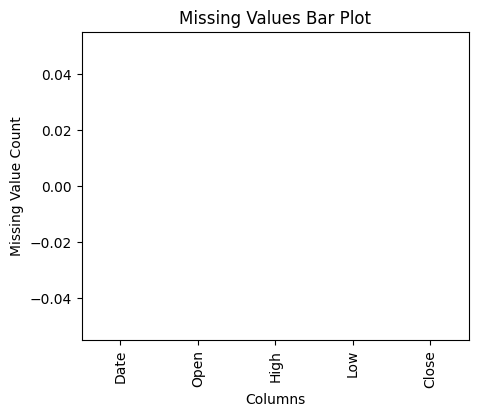

In [20]:
plt.figure(figsize=(5, 4))
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')
plt.title('Missing Values Bar Plot')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.show()


### Understanding Your Variables

In [21]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [22]:
# Dataset Describe
data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [23]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Date - Date of the record. It has monthly dates from July 2005 to November 2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [34]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
data_copy= data.copy()

In [35]:
#converting datatype of Date from string to Datetime
data_copy['Date']=pd.to_datetime(data_copy['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [36]:
data_copy.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [37]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [39]:
data_copy.describe()

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


In [41]:

col=data_copy.columns.to_list()
numerical_cols=col[1:]

numerical_cols

['Open', 'High', 'Low', 'Close']

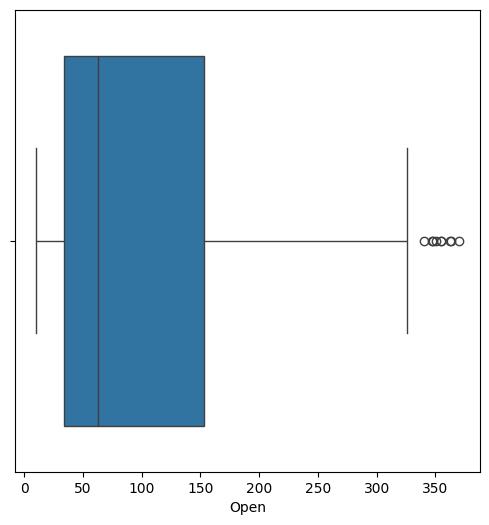

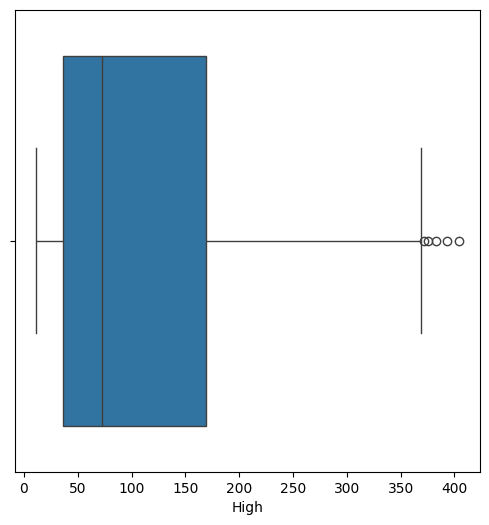

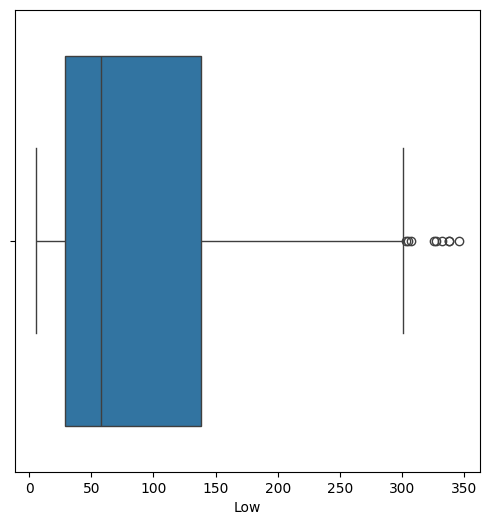

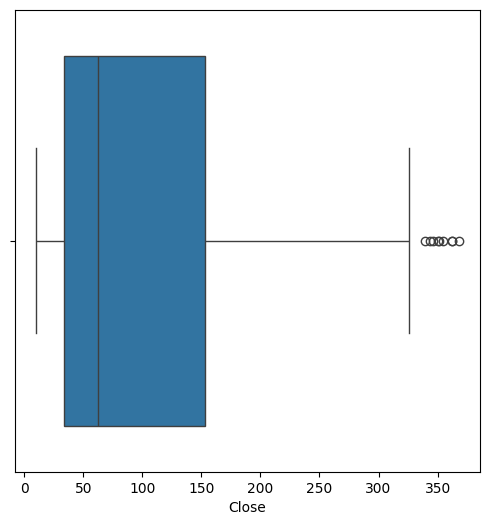

In [43]:

for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(data_copy[column],orient='h')
  plt.xlabel(column, fontsize=10)
  plt.show()

In [45]:
#setting the Date as index.
data_copy.set_index('Date', inplace=True)

In [48]:
# seperating the data
independent_variables = data_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print("Independent_variables are ",independent_variables)
print("Dependent_variable is",dependent_variable)

Independent_variables are  ['Open', 'High', 'Low']
Dependent_variable is ['Close']


#### 1) To Understand the Yearly stock closing price 

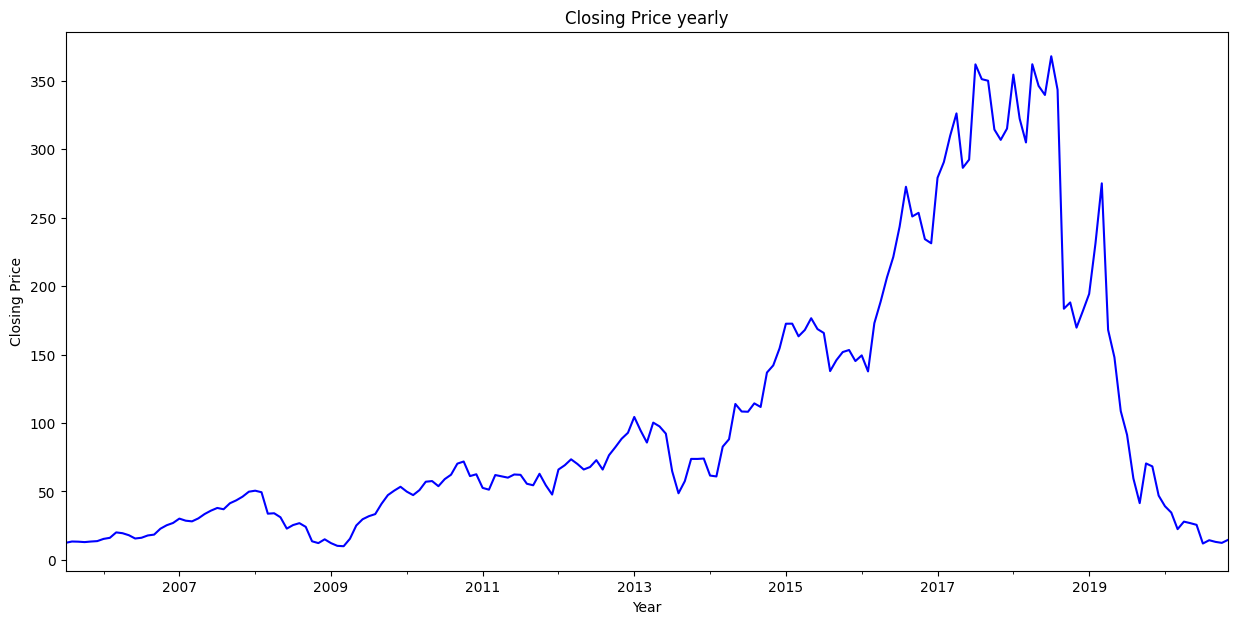

In [51]:

plt.figure(figsize=(15,7))
data_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

#### Understanding the Distibution of the Dependent Varable 

C:\Users\gouse\AppData\Local\Temp\ipykernel_9612\3850765499.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['Close'],color="b")


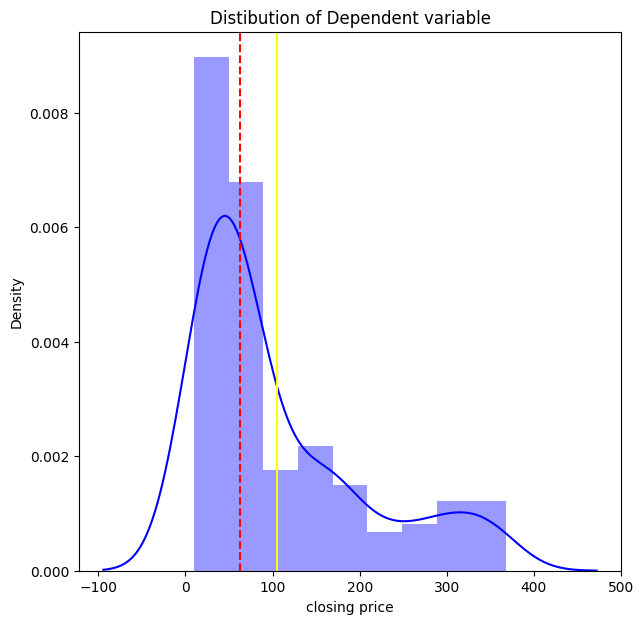

In [52]:
# Dependent variable 'Close'
#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(data_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(data_copy['Close'].mean(),color='yellow')
plt.axvline(data_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

####  Understainding the distributions of Independent features.

C:\Users\gouse\AppData\Local\Temp\ipykernel_9612\913437367.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy [col], color='b')
C:\Users\gouse\AppData\Local\Temp\ipykernel_9612\913437367.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy [col], color='b')
C:\Users\gouse\App

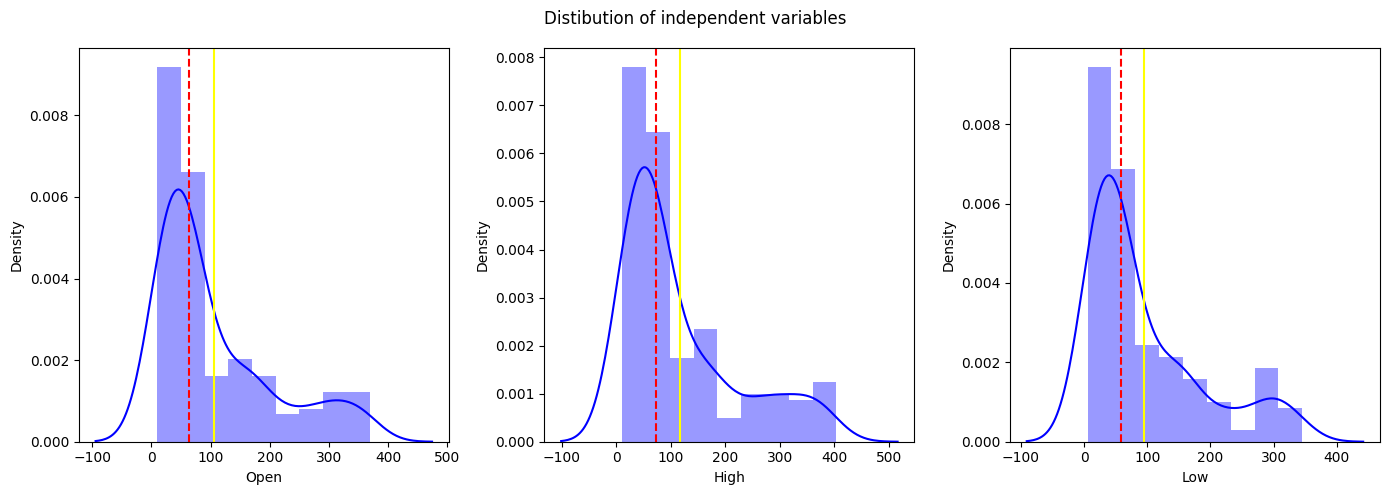

In [53]:


# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(data_copy [col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(data_copy [col].mean(), color='yellow')
    plt.axvline(data_copy [col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

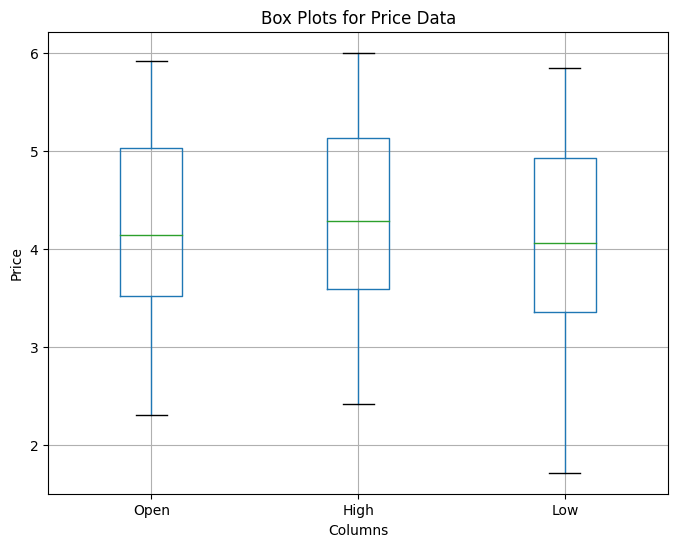

In [55]:
df_price = np.log(data_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

#### Ploting the Co-relation between the Individual independent vs dependent Varable 

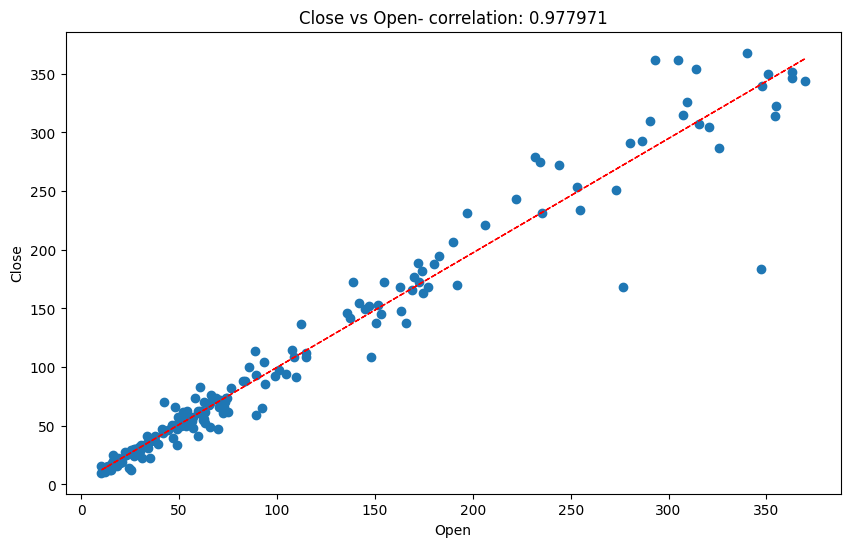

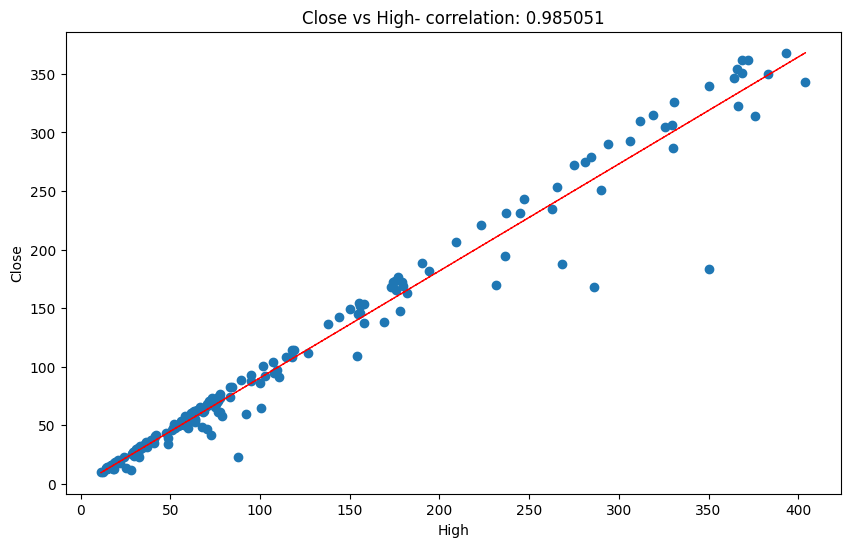

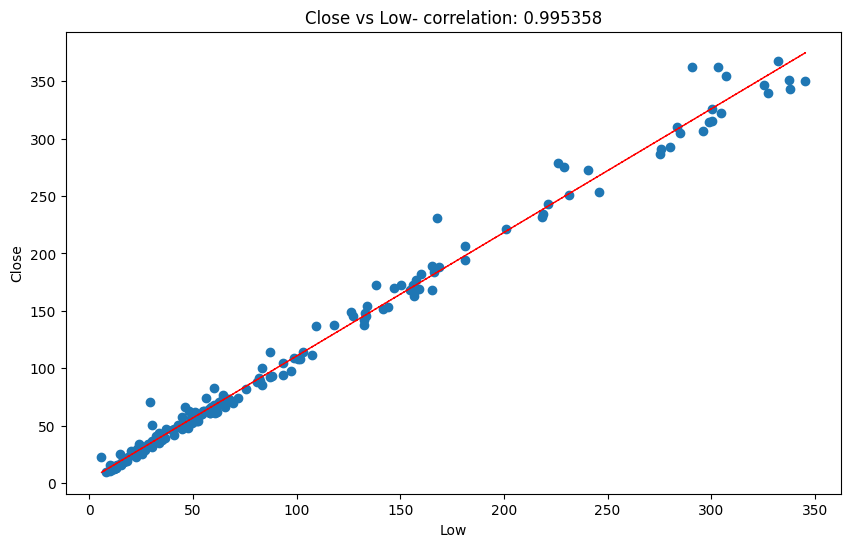

In [57]:
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(10, 6))
  ax = fig.gca()
  feature = data_copy[col]
  label = data_copy['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(data_copy[col], data_copy['Close'], 1)
  y_ = np.poly1d(z)(data_copy[col])

  plt.plot(data_copy[col], y_, "r--", lw=1)

plt.show()

#### Trends Of the closing Prise in the yearly basise 

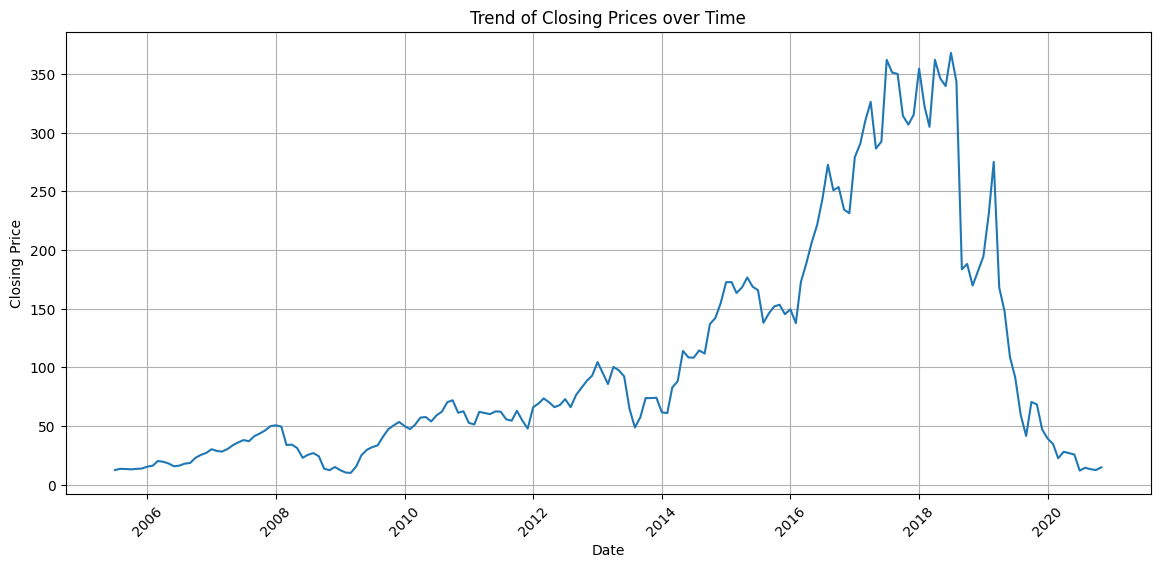

In [59]:
# Extract the date and closing price columns from the dataset
dates = data_copy.index
closing_prices = data_copy['Close']

# Create a line plot
plt.figure(figsize=(14, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Correlation Heatmap

<Axes: >

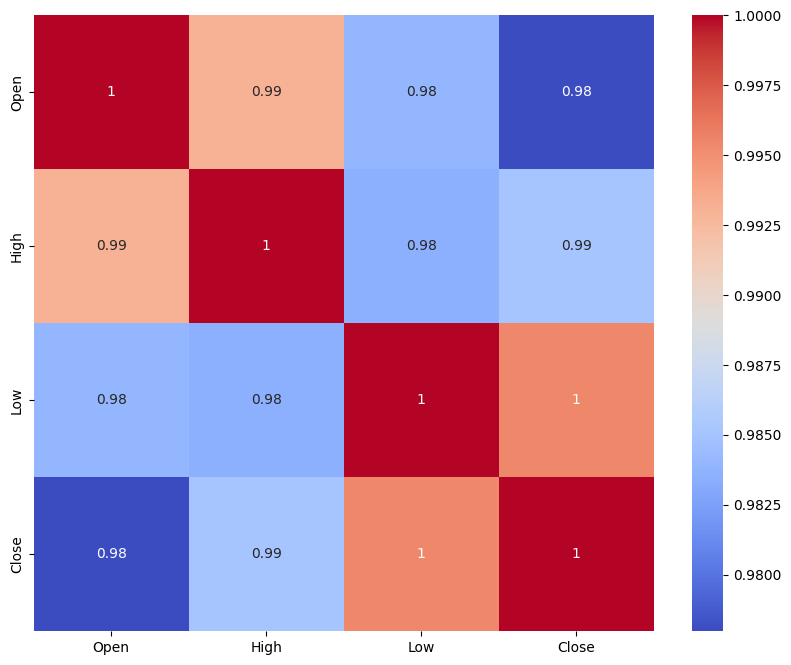

In [61]:

# Correlation Heatmap visualization code

plt.figure(figsize=(10,8))
correlation = data_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Hypothetical Statement - 1
##### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
*Null Hypothesis (H0):* There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

*Alternate Hypothesis (H1):* There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = data_copy['Close'][data_copy.index.year <= 2017]
second_half = data_copy['Close'][data_copy.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))
print("The standard_error is :",round(standard_error,2))
      

# Calculate the z-score
z = (mean1 - mean2) / standard_error
print("The Z_Score is :",round(z,2))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print("The P_value is :",round(p_value,2))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


The standard_error is : 23
The Z_Score is : -2.39
The P_value is : 0.02
Reject the null hypothesis. There is a significant difference in means.


## Hypothetical Statement - 2
#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
##### Statement: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices. Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices..

In [69]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Calculate the mean opening and closing prices for each month
data_copy['Month'] = data_copy.index.strftime('%Y-%m')
monthly_data = data_copy.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))
print("z_statistic value is :",round(z_statistic,2))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)


# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")


z_statistic value is : 13.57
Reject the null hypothesis. There is a significant difference in the mean closing prices.


In [75]:
from scipy import stats

# Divide the data into groups based on opening prices
high_opening_prices = data_copy[data_copy['Open'] > threshold]['Close']
low_opening_prices = data_copy[data_copy['Open'] <= threshold]['Close']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(high_opening_prices, low_opening_prices)
print("The p_value is: ",p_value)
print("The t_statistic is: ",round(t_statistic,2))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")


The p_value is:  1.8314865412225345e-29
The t_statistic is:  13.57
Reject the null hypothesis. There is a significant difference in the mean closing prices.
